In [7]:
import os
from glob import glob
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from matplotlib import patches as mpatches
from matplotlib import colors
import seaborn as sns
import numpy as np
import numpy.ma as ma
from shapely.geometry import mapping, box 
from rasterio.plot import plotting_extent
import xarray as xr
import rioxarray as rxr 
import geopandas as gpd 
import earthpy as et 
import earthpy.spatial as es 
import earthpy.plot as ep 

sns.set_style("white")
sns.set(font_scale=1.5)

In [2]:
data2 = et.data.get_data("cs-test-landsat")

Extracted output to /home/codespace/earth-analytics/data/cs-test-landsat/.


In [3]:
os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

In [4]:
def combine_tifs(tif_list):
    out_xr = []
    for i, tif_path in enumerate(tif_list):
        out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
        out_xr[i]["band"] = i+1
    return xr.concat(out_xr, dim="band")

In [8]:
all_landsat_bands_path = glob(os.path.join("cold-springs-fire", "landsat_collect", "LC080340322016072301T1-SC20180214145802",
                                           "crop",
                                           "*band[5-7]*.tif"))

all_landsat_bands_path.sort()

landsat_post_fire = combine_tifs(all_landsat_bands_path)

extent_landsat = plotting_extent(landsat_post_fire[0].values, landsat_post_fire.rio.transform())

landsat_post_fire

<xarray.DataArray (band: 3, y: 177, x: 246)> Size: 523kB
array([[[2445., 2271., 2417., ..., 1734., 1904., 2101.],
        [2662., 2465., 2532., ..., 1736., 1824., 2165.],
        [2880., 2872., 2750., ..., 1897., 2116., 2300.],
        ...,
        [1900., 1917., 2076., ..., 1722., 1891., 1890.],
        [1779., 1893., 1983., ..., 1645., 1847., 2090.],
        [1553., 1440., 1587., ..., 1562., 1689., 1964.]],

       [[2864., 2974., 3108., ...,  983., 1195., 1271.],
        [2527., 2827., 3008., ..., 1132., 1293., 1546.],
        [2141., 2427., 2433., ..., 1324., 1652., 1922.],
        ...,
        [1662., 1757., 1922., ..., 1463., 1472., 1519.],
        [1786., 1532., 1554., ..., 1374., 1423., 1450.],
        [1071.,  943.,  975., ..., 1524., 1461., 1518.]],

       [[1920., 1979., 2098., ...,  537.,  660.,  687.],
        [1505., 1863., 1975., ...,  651.,  747.,  924.],
        [1240., 1407., 1391., ...,  769., 1018., 1189.],
        ...,
        [1216., 1190., 1398., ...,  877.,  890.,  928.],
        [1517., 1184., 1078., ...,  846.,  810.,  820.],
        [ 660.,  593.,  623., ...,  984.,  909.,  880.]]], dtype=float32)
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  5571
    STATISTICS_MEAN:     1958.570001378
    STATISTICS_MINIMUM:  -2
    STATISTICS_STDDEV:   557.005903918
    scale_factor:        1.0
    add_offset:          0.0

In [9]:
fire_boundary_path = os.path.join("cold-springs-fire", "vector_layers", "fire-boundary-geomac", "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

fire_bound_utmz13 = fire_boundary.to_crs(landsat_post_fire.rio.crs)

In [10]:
landsat_postfire_nbr = (landsat_post_fire[0] - landsat_post_fire[2]) / (landsat_post_fire[0] + landsat_post_fire[2])

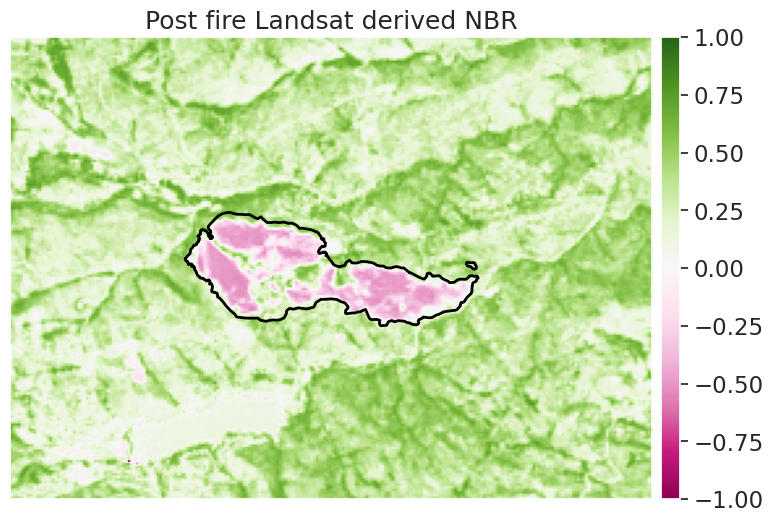

In [11]:
fig, ax = plt.subplots(figsize=(12,6))

ep.plot_bands(landsat_postfire_nbr, cmap="PiYG", vmin=-1, vmax=1, ax=ax, extent=extent_landsat, title="Post fire Landsat derived NBR")

fire_bound_utmz13.plot(ax=ax, color="None", edgecolor="black", linewidth=2)
plt.show()

In [12]:
ls cold-springs-fire/landsat_collect

LC080340322016070701T1-SC20180214145604/
LC080340322016072301T1-SC20180214145802/


In [13]:
all_landsat_bands_path = glob(os.path.join("cold-springs-fire", "landsat_collect", "LC080340322016070701T1-SC20180214145604",
                                           "crop",
                                           "*band[5-7]*.tif"))

all_landsat_bands_path.sort()

landsat_pre_fire = combine_tifs(all_landsat_bands_path)

landsat_prefire_nbr = (landsat_pre_fire[0] - landsat_pre_fire[2]) / (landsat_pre_fire[0] + landsat_pre_fire[2])

In [14]:
landsat_prefire_nbr

<xarray.DataArray (y: 177, x: 246)> Size: 174kB
array([[0.18081181, 0.16671672, 0.20630993, ..., 0.5043029 , 0.45498586,
        0.50830096],
       [0.31503716, 0.23229888, 0.24215247, ..., 0.44627056, 0.41451806,
        0.40289664],
       [0.399458  , 0.40442654, 0.40960962, ..., 0.4150289 , 0.35682818,
        0.32290438],
       ...,
       [0.14791264, 0.2313871 , 0.22431506, ..., 0.30827066, 0.3842546 ,
        0.37305865],
       [0.1628615 , 0.08483291, 0.22357343, ..., 0.28146288, 0.36778525,
        0.42458966],
       [0.29244164, 0.44484305, 0.42986426, ..., 0.23665224, 0.2780083 ,
        0.35015383]], dtype=float32)
Coordinates:
  * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 8B 0

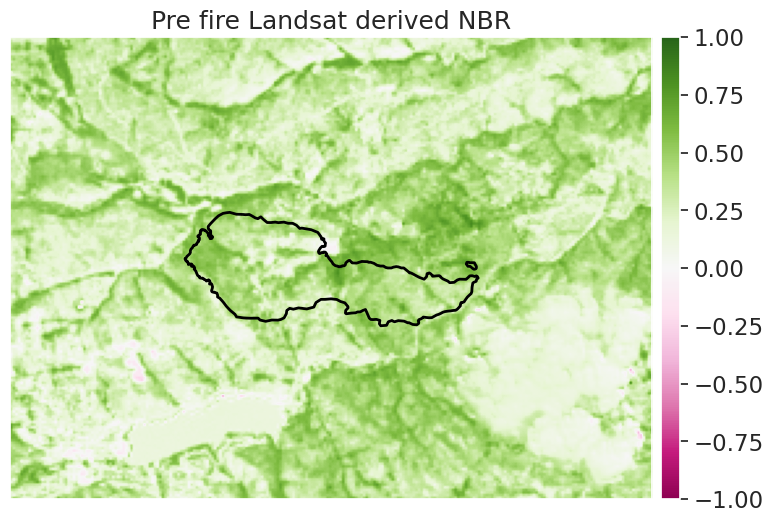

In [15]:
fig, ax = plt.subplots(figsize=(12,6))

ep.plot_bands(landsat_prefire_nbr, cmap="PiYG", vmin=-1, vmax=1, ax=ax, extent=extent_landsat, title="Pre fire Landsat derived NBR")

fire_bound_utmz13.plot(ax=ax, color="None", edgecolor="black", linewidth=2)
plt.show()

In [16]:
dnbr_landsat = landsat_prefire_nbr - landsat_postfire_nbr
dnbr_landsat

<xarray.DataArray (y: 177, x: 246)> Size: 174kB
array([[ 0.06053689,  0.09801085,  0.13565655, ..., -0.02277768,
        -0.03019354,  0.00112736],
       [ 0.03737938,  0.09320462,  0.11856693, ..., -0.00827491,
        -0.00438508,  0.00114849],
       [ 0.00139973,  0.06205684,  0.08142802, ..., -0.00807688,
         0.00647721,  0.00447503],
       ...,
       [-0.07159956, -0.00260067,  0.02915099, ..., -0.01685438,
         0.02431214,  0.03168178],
       [ 0.08337121, -0.14558633, -0.07208158, ..., -0.03929183,
        -0.02250457, -0.01183644],
       [-0.111083  ,  0.02821738, -0.00633484, ...,  0.00962946,
        -0.02222264, -0.03099948]], dtype=float32)
Coordinates:
  * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 8B 0

In [17]:
dnbr_class_bins = [-np.inf, -.1, .1, .27, .66, np.inf]

dnbr_landsat_class = xr.apply_ufunc(np.digitize, dnbr_landsat, dnbr_class_bins)

dnbr_landsat_class

<xarray.DataArray (y: 177, x: 246)> Size: 348kB
array([[2, 2, 3, ..., 2, 2, 2],
       [2, 2, 3, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 1, 2, ..., 2, 2, 2],
       [1, 2, 2, ..., 2, 2, 2]])
Coordinates:
  * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 8B 0

In [18]:
dnbr_cat_names = ["Enhanced regrowth",
                  "Unburned",
                  "Low severity",
                  "Moderate severity",
                  "High severity"]

nbr_colors = ["g","yellowgreen", "peachpuff", "coral", "maroon"]

nbr_cmap = ListedColormap(nbr_colors)

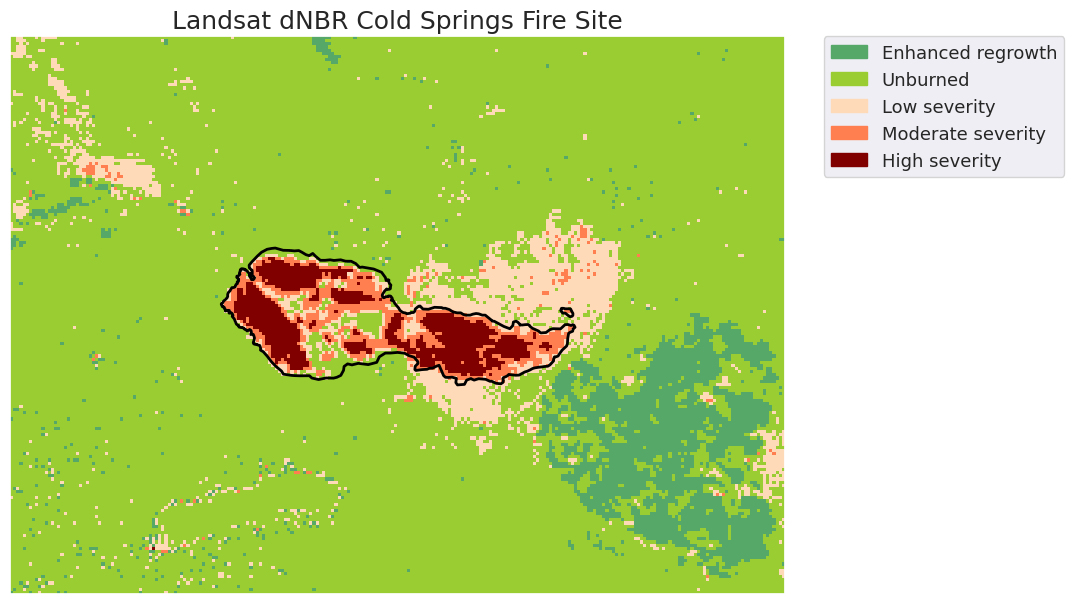

In [19]:
dnbr_landsat_class_plot = ma.masked_array(dnbr_landsat_class.values, dnbr_landsat_class.isnull())

fig, ax = plt.subplots(figsize=(10,8))

fire_bound_utmz13.plot(ax=ax, color="None", edgecolor="black", linewidth=2)

classes = np.unique(dnbr_landsat_class_plot)
classes = classes.tolist()[:5]

ep.plot_bands(dnbr_landsat_class_plot, cmap=nbr_cmap, vmin=1, vmax=5, title="Landsat dNBR Cold Springs Fire Site", cbar=False, scale=False, extent=extent_landsat, ax=ax)

ep.draw_legend(im_ax=ax.get_images()[0], classes=classes, titles=dnbr_cat_names)
plt.show()

In [20]:
dnbr_path = os.path.join("cold-springs-fire", "outputs", "dnbr_landsat.tif")

dnbr_landsat_class.rio.to_raster(dnbr_path, dtype="int8")